# Matplotlib base

In [5]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib widget

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
a = np.array([3., 5.6,3.3, 4.7,])

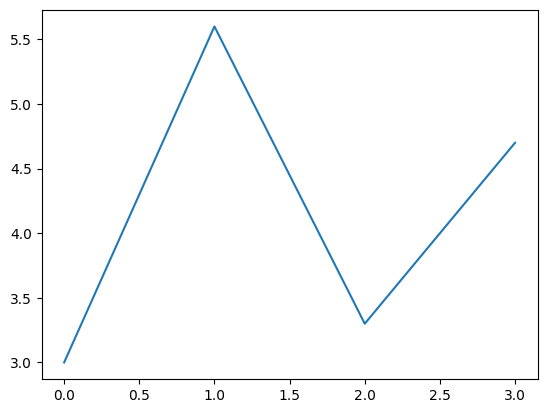

In [14]:
plt.plot(a)

# Il faut avoir une approche objet!!

De mieux choisir explicitement, si on tarce 2 courbes sur 2 figures ou sur une seule.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


Text(0, 0.5, 'weigth')

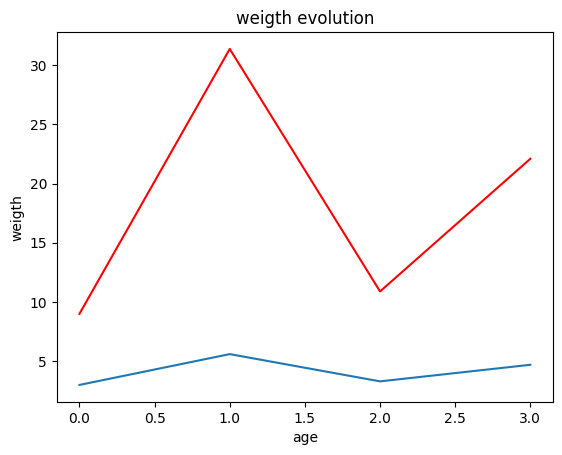

In [15]:
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))
ax.plot(a)
ax.plot(a**2, color='r')
ax.set_title('weigth evolution')
ax.set_xlabel('age')
ax.set_ylabel('weigth')

Celà permet aussi de générer une grille de subplot.

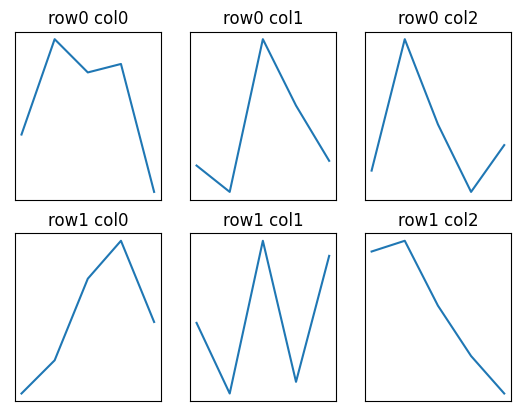

In [16]:
# on fait une grille
fig, axs = plt.subplots(nrows=2, ncols=3)
for r in range(2):
    for c in range(3):
        ax = axs[r,c]
        ax.plot(np.random.rand(5))
        ax.set_title(f'row{r} col{c}')
        ax.set_xticks([])
        ax.set_yticks([])
fig.savefig('mafigure.svg')


# 2 variables

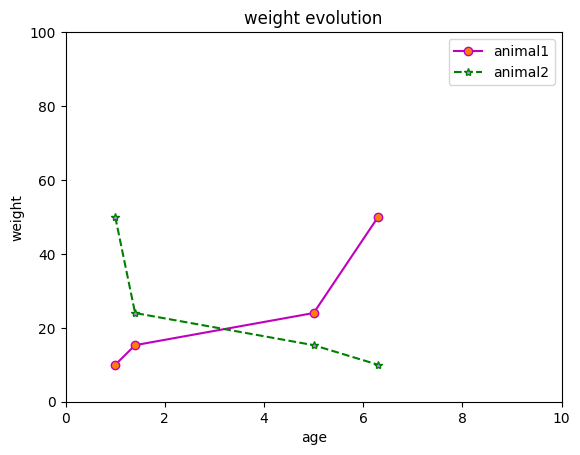

In [17]:
fig, ax = plt.subplots()
a = np.array([1, 1.4, 5, 6.3])
w = np.array([10, 15.3, 24, 50.])
w2 = w[::-1]
ax.plot(a, w, marker='o', linestyle='-', color='m', markerfacecolor='#FF8000', label='animal1')
ax.plot(a, w2, marker='*', linestyle='--', color='g', markerfacecolor='#C280FF', label='animal2')
ax.set_title('weight evolution')
ax.set_xlabel('age')
ax.set_ylabel('weight')
ax.set_xlim(0,10)
ax.set_ylim(0,100)
ax.legend()

 # scatter plot
 pour un nuage de point c'est identique mais sauf le line style

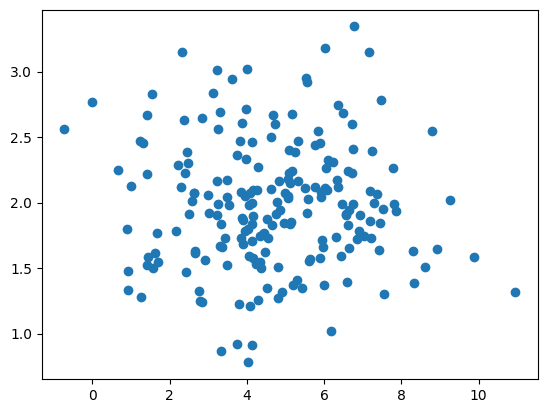

In [18]:
fig, ax = plt.subplots()
x = np.random.randn(200)*2+5
y = np.random.randn(200)/2+2
ax.plot(x, y, marker='o', linestyle='None', )


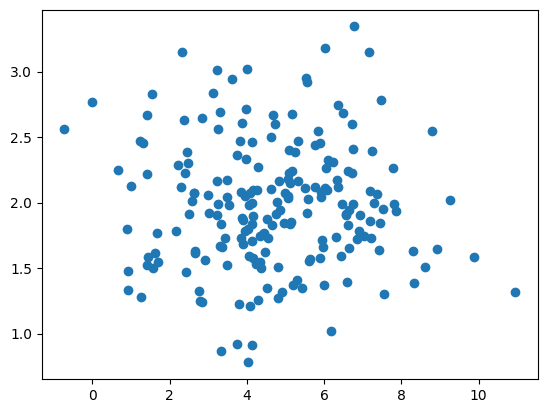

In [19]:
fig, ax = plt.subplots()
ax.scatter(x, y, marker='o')

# histogram
numpy propose une fonction histogram qui renvois count, bins.
Attention le vecteur bins correspond au limites de bins donc count.size = bins.size - 1


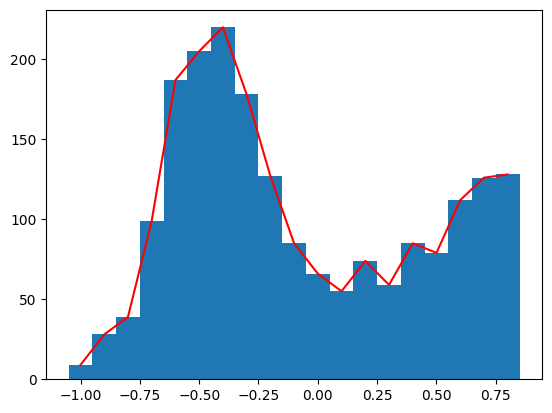

In [20]:
#TODO detail du count
a = np.concatenate([np.random.randn(1000)*.2-.4, np.random.randn(4000)+1.6])
bins = np.arange(-1, 1, .1)
count, bins = np.histogram(a, bins=bins)
fig, ax = plt.subplots()
ax.bar(bins[:-1],count,width=.1)
ax.plot(bins[:-1],count, color='r')

(array([  2.,   2.,   6.,   8.,  25.,  64., 156., 289., 298., 218., 120.,
         85.,  86.,  93., 111., 132., 171., 166., 183., 210., 214., 225.,
        210., 222., 194., 202., 175., 191., 167., 134., 111., 112.,  75.,
         77.,  62.,  56.,  34.,  37.,  25.,  18.,  13.,   8.,   5.,   2.,
          1.,   2.,   0.,   1.,   0.,   2.]),
 array([-1.50757868, -1.37113845, -1.23469822, -1.09825799, -0.96181776,
        -0.82537753, -0.68893731, -0.55249708, -0.41605685, -0.27961662,
        -0.14317639, -0.00673617,  0.12970406,  0.26614429,  0.40258452,
         0.53902475,  0.67546497,  0.8119052 ,  0.94834543,  1.08478566,
         1.22122589,  1.35766611,  1.49410634,  1.63054657,  1.7669868 ,
         1.90342703,  2.03986726,  2.17630748,  2.31274771,  2.44918794,
         2.58562817,  2.7220684 ,  2.85850862,  2.99494885,  3.13138908,
         3.26782931,  3.40426954,  3.54070976,  3.67714999,  3.81359022,
         3.95003045,  4.08647068,  4.2229109 ,  4.35935113,  4.49579136,
 

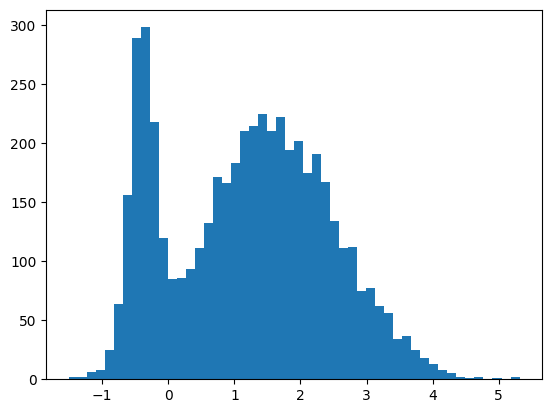

In [21]:
#plus simplement
fig, ax = plt.subplots()
ax.hist(a, bins=50)

# image

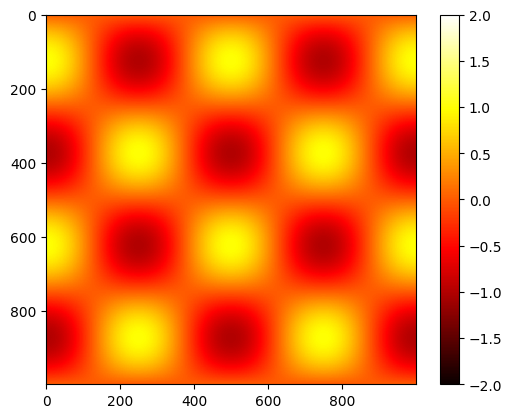

In [22]:
# generationdes data : une belle boite d'oeuf vu du dessus
x = np.cos(np.linspace(0, 4*np.pi, 1000))
y = np.sin(np.linspace(0, 4*np.pi, 1000))
X,Y = np.meshgrid(x,y)
data = Y*X

# attention interpolation
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='hot', interpolation='nearest')
im.set_clim(-2, 2)
fig.colorbar(im, ax=ax)

# fill_between

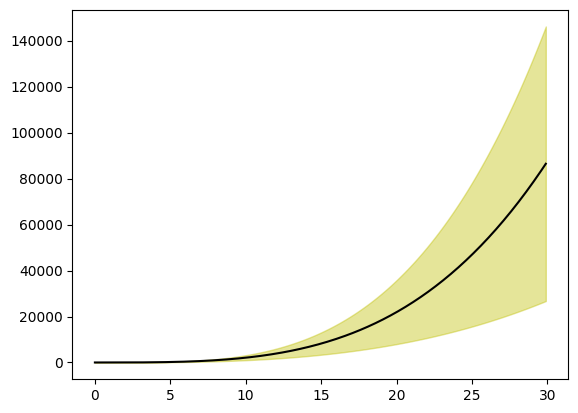

In [23]:
fig, ax = plt.subplots()
x = np.arange(0,30, .1)
y1 = x**3
y2 = x**3.5
m = (y1 + y2)/2

ax.fill_between(x, y1, y2, color='y', alpha=.4)
ax.plot(x, m, color='k')


# Excercice 1


Créer un signal sinusoidal de frequence 5Hz sur l'interval  0-3s

Aide : il faut créer un vecteur **temps**

Frequence echantillonage de 1000Hz


# Solution 1

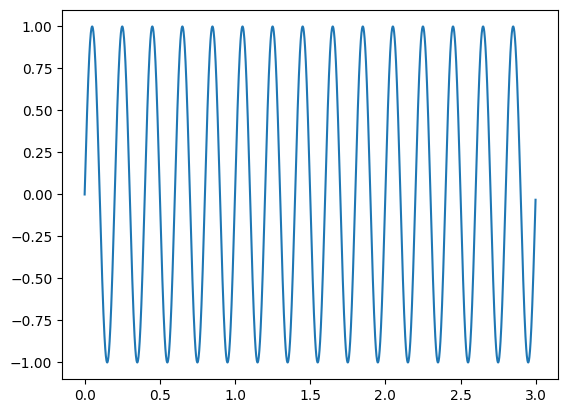

In [24]:
freq = 5.
sample_rate = 1000.
duration = 3.
times = np.arange(0, duration, 1/sample_rate)

sig = np.sin(times * 2 * np.pi * freq)

fig, ax = plt.subplots()
ax.plot(times, sig)



# exercice 2

Idem exercice 1 mais avec du bruit blanc.



# Solution 2

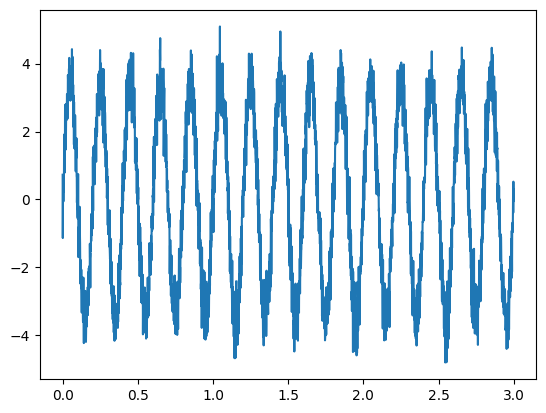

In [25]:
freq = 5.
sample_rate = 1000
times = np.arange(0, 3, 1./sample_rate)
sig = np.sin(2*np.pi*freq*times) * 3.5
noise = np.random.randn(sig.shape[0]) * .5
sig = sig + noise
fig, ax = plt.subplots()
ax.plot(times, sig)



# excerice 3

  * Générer 9 signaux sinusoidaux de frequence 5Hz entre 0 et 3.s.
  * Chaque signal a niveau de bruit de plus en plus grand (faire un peu comme on veut)
  * Sur la figure 1 : Afficher chaque signal dans un subplot sur une grille
  * Sur la figure 2 : afficher la moyenne et la std.

# Solution 3

(9, 3000)


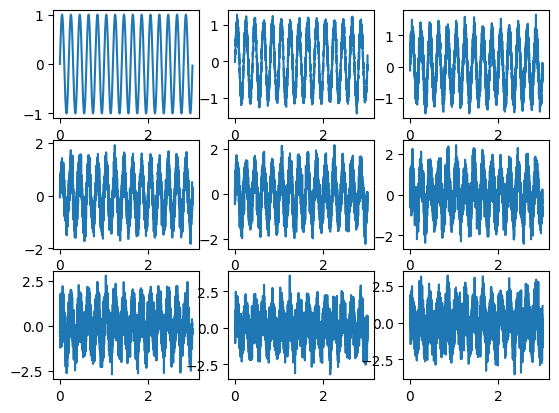

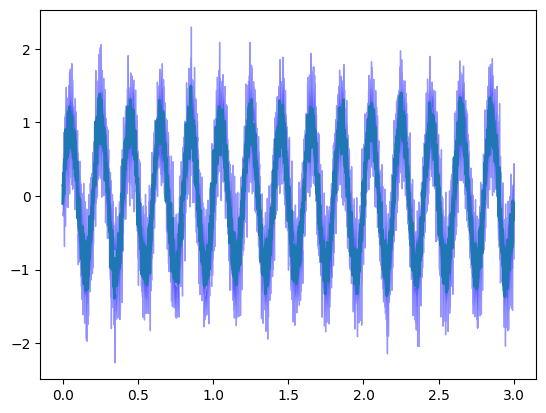

In [26]:
sampling_rate = 1000.
freq = 5.
times = np.arange(0,3, 1./sampling_rate)

#generate data
sigs = []
for i in range(9):
    sig = np.sin(np.pi*2*freq*times)
    noise = np.random.randn(sig.size)*i*.1
    sig = sig + noise
    sigs.append(sig)

fig1, axs = plt.subplots(nrows=3, ncols=3)
#axs = axs.reshape(-1)
axs = axs.flatten()
for i, sig in enumerate(sigs):
    ax = axs[i]
    ax.plot(times, sig)


fig2, ax = plt.subplots()
tab_sigs = np.vstack(sigs)
print(tab_sigs.shape)

m = np.mean(tab_sigs, axis=0)
s = np.std(tab_sigs, axis=0)

ax.plot(times, m, linewidth=2)
ax.fill_between(times, m-s, m+s, color='b', alpha=.4)
